In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
URL = 'https://www.amazon.com/s?k=macbook&crid=36RFS9O24MYNP&sprefix=playsmacbook%2Caps%2C370&ref=nb_sb_noss'

In [3]:
#headers for requests
Header = ({'User-Agent' : 'https://developers.whatismybrowser.com/useragents/parse/?analyse-my-user-agent=yes', 'Accept-Language': 'en-US, en;q=0.5'})

In [4]:
# HTTP request
webpage = requests.get(URL, headers = Header)
webpage

<Response [200]>

In [5]:
webpage.content

b'<!doctype html><html lang="en-us" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-na.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function()

In [6]:
#soup object containing all data
soup = BeautifulSoup(webpage.content, "html.parser")
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [7]:
# fetch all links from the page
links = soup.find_all("a", attrs= {'class' : 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

#get all the links in list form
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Apple-MacBook-13-inch-256GB-Storage/dp/B08N5LNQCX/ref=sr_1_1?crid=36RFS9O24MYNP&amp;keywords=macbook&amp;qid=1670947563&amp;sprefix=playsmacbook%2Caps%2C370&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">2020 Apple MacBook Air Laptop: Apple M1 Chip, 13” Retina Display, 8GB RAM, 256GB SSD Storage, Backlit Keyboard, FaceTime HD Camera, Touch ID. Works with iPhone/iPad; Space Gray</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/2022-Apple-MacBook-Laptop-chip/dp/B0B3BVWJ6Y/ref=sr_1_2?crid=36RFS9O24MYNP&amp;keywords=macbook&amp;qid=1670947563&amp;sprefix=playsmacbook%2Caps%2C370&amp;sr=8-2"><span class="a-size-medium a-color-base a-text-normal">2022 Apple MacBook Air Laptop with M2 chip: 13.6-inch Liquid Retina Display, 8GB RAM, 256GB SSD Storage, Backlit Keyboard, 1080p FaceTime HD Camera. Works with iPhone an

In [8]:
# accessing 1st product link
prod_link_1st = links[0]
prod_link_1st

<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Apple-MacBook-13-inch-256GB-Storage/dp/B08N5LNQCX/ref=sr_1_1?crid=36RFS9O24MYNP&amp;keywords=macbook&amp;qid=1670947563&amp;sprefix=playsmacbook%2Caps%2C370&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">2020 Apple MacBook Air Laptop: Apple M1 Chip, 13” Retina Display, 8GB RAM, 256GB SSD Storage, Backlit Keyboard, FaceTime HD Camera, Touch ID. Works with iPhone/iPad; Space Gray</span> </a>

In [9]:
product_title_link_1st =prod_link_1st.get('href')
product_title_link_1st

'/Apple-MacBook-13-inch-256GB-Storage/dp/B08N5LNQCX/ref=sr_1_1?crid=36RFS9O24MYNP&keywords=macbook&qid=1670947563&sprefix=playsmacbook%2Caps%2C370&sr=8-1'

In [10]:
# concatenating amazon_website http with the link to get the product link page
product_link = 'https://amazon.com'+ product_title_link_1st
product_link

'https://amazon.com/Apple-MacBook-13-inch-256GB-Storage/dp/B08N5LNQCX/ref=sr_1_1?crid=36RFS9O24MYNP&keywords=macbook&qid=1670947563&sprefix=playsmacbook%2Caps%2C370&sr=8-1'

In [11]:
#get the response from the particular product page
new_webpage = requests.get(product_link, headers = Header)
new_webpage

<Response [200]>

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
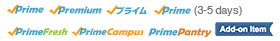

In [12]:
#new_soup object containing all data
new_soup = BeautifulSoup(new_webpage.content, "html.parser")
new_soup

In [13]:
Product_Title = new_soup.find("span", attrs = {'class' : 'a-size-large product-title-word-break'}).text.strip()
Product_Title

'2020 Apple MacBook Air Laptop: Apple M1 Chip, 13” Retina Display, 8GB RAM, 256GB SSD Storage, Backlit Keyboard, FaceTime HD Camera, Touch ID. Works with iPhone/iPad; Space Gray'

In [14]:
Product_price = new_soup.find("span", attrs = {'class' : "a-color-price a-text-bold"}).text
Product_price

'Currently unavailable.'

In [15]:
product_rating = new_soup.find("i", attrs = {'class' : "a-icon a-icon-star a-star-5"}).text
product_rating

'4.8 out of 5 stars'

In [16]:
product_review_count = new_soup.find("span", attrs= {'id' : 'acrCustomerReviewText'}).text
product_review_count

'13,789 ratings'